<a href="https://colab.research.google.com/github/aslamcm/Projects/blob/main/Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
from google.colab import files

In [93]:
uploaded=files.upload()

Saving Telco-Customer-Churn.csv to Telco-Customer-Churn (1).csv


In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
dataset = pd.read_csv('Telco-Customer-Churn.csv')
dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [96]:
dataset.dtypes 

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [97]:
#changing the column types:
dataset.TotalCharges = pd.to_numeric(dataset.TotalCharges, errors = 'coerce')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [98]:
# We observe missing values in TotalCharges column
# find missing values
dataset[dataset.isnull().any(axis = 1)]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


Missing values are present in TotalCharges column

Filiing the missing values in TotalCharges column with 0

In [99]:
dataset.TotalCharges = dataset.TotalCharges.fillna(0)


In [100]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [101]:
dataset[dataset.isnull().any(axis = 1)]
#we observe and confirm no missing values in TotalCharges column

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


EDA : Categorical and Numerical Variable

In [102]:
# Separating the categorical and Numerical columns
customerid = ['customerID']
target = ['churn']

In [103]:
#seperating the categorical and numerical column names as lists
categorical = dataset.columns[dataset.dtypes == 'object'].tolist()
categorical.remove('Churn')
categorical.remove('customerID')
categorical

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [104]:
#Seperating Numerical 

In [105]:
numerical = dataset.columns[dataset.dtypes != 'object'].tolist()
numerical

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

One hot Encoding caetgorical Variables

In [106]:
#OHE categorical variables
df = pd.get_dummies(data = dataset , columns = categorical, drop_first= True)

Scaling Numerical Variables

In [107]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
#fitting the scalar to numerical columns
sc_numerical = scaler.fit_transform(dataset[numerical])
#building a new dataframe
sc_numerical = pd.DataFrame(sc_numerical, columns = numerical)
sc_numerical

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,-0.439916,-1.277445,-1.160323,-0.992611
1,-0.439916,0.066327,-0.259629,-0.172165
2,-0.439916,-1.236724,-0.362660,-0.958066
3,-0.439916,0.514251,-0.746535,-0.193672
4,-0.439916,-1.236724,0.197365,-0.938874
...,...,...,...,...
7038,-0.439916,-0.340876,0.665992,-0.127605
7039,-0.439916,1.613701,1.277533,2.242606
7040,-0.439916,-0.870241,-1.168632,-0.852932
7041,2.273159,-1.155283,0.320338,-0.870513


In [108]:
#dropping unscaled numerical columns
df = df.drop(columns = numerical , axis =1)
df

,customerID,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,No,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,5575-GNVDE,No,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,Yes,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,7795-CFOCW,No,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,9237-HQITU,Yes,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,No,1,1,1,1,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,1,0,1,0,0,1
7039,2234-XADUH,No,0,1,1,1,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,1,1,0,0
7040,4801-JZAZL,No,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
7041,8361-LTMKD,Yes,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [109]:
# merging the categorical columns with scaled numerical columns
data_merged = df.merge(right = sc_numerical, how = 'left', left_index = True, right_index= True)
data_merged.head()

,customerID,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,7590-VHVEG,No,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,-0.439916,-1.277445,-1.160323,-0.992611
1,5575-GNVDE,No,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,-0.439916,0.066327,-0.259629,-0.172165
2,3668-QPYBK,Yes,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,-0.439916,-1.236724,-0.362660,-0.958066
3,7795-CFOCW,No,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,-0.439916,0.514251,-0.746535,-0.193672
4,9237-HQITU,Yes,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,-0.439916,-1.236724,0.197365,-0.938874


Analysing Churn Distribution

In [110]:
data_merged.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

Splitting the dataset

In [111]:
from sklearn.model_selection import train_test_split
train , test = train_test_split(data_merged , test_size = 0.25)

In [112]:
data_merged.columns

Index(['customerID', 'Churn', 'gender_Male', 'Partner_Yes', 'Dependents_Yes',
       'PhoneService_Yes', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [113]:
target = ['Churn']
customerid = ['customerID']

cols = [x for x in data_merged.columns if x not in target + customerid]
cols

['gender_Male',
 'Partner_Yes',
 'Dependents_Yes',
 'PhoneService_Yes',
 'MultipleLines_No phone service',
 'MultipleLines_Yes',
 'InternetService_Fiber optic',
 'InternetService_No',
 'OnlineSecurity_No internet service',
 'OnlineSecurity_Yes',
 'OnlineBackup_No internet service',
 'OnlineBackup_Yes',
 'DeviceProtection_No internet service',
 'DeviceProtection_Yes',
 'TechSupport_No internet service',
 'TechSupport_Yes',
 'StreamingTV_No internet service',
 'StreamingTV_Yes',
 'StreamingMovies_No internet service',
 'StreamingMovies_Yes',
 'Contract_One year',
 'Contract_Two year',
 'PaperlessBilling_Yes',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check',
 'SeniorCitizen',
 'tenure',
 'MonthlyCharges',
 'TotalCharges']

In [114]:
X_train = train[cols]
y_train = train[target]
X_test = test[cols]
y_test =  test[target]

Implementing Logistic Regression Model


In [115]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

#fitting the logreg model to the training data
logreg.fit(X_train , y_train.values.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [116]:
# Making Predicitions using our fitted model

y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)

Calculating the accuracy

In [117]:
from sklearn.metrics import accuracy_score, precision_score , recall_score 

#accuracy score on train and test data

accuracy_train = accuracy_score(y_train , y_train_pred)
accuracy_test = accuracy_score(y_test , y_test_pred)

print("accuracy_train: ", round(accuracy_train, 4))
print("accuracy_test: ", round(accuracy_test, 4))

accuracy_train:  0.8101
accuracy_test:  0.7984


In [118]:
#precision scores on train and test set
precision_train = precision_score(y_train , y_train_pred , pos_label="No")
precision_test = precision_score(y_test , y_test_pred, pos_label="No")

print('precision_train:', round(precision_train, 4))
print('precision_test: ', round(precision_test, 4))


precision_train: 0.8497
precision_test:  0.8355


In [119]:

#recall score on the train and test set

recall_train = recall_score(y_train , y_train_pred, pos_label="No")
recall_test = recall_score(y_test, y_test_pred, pos_label="No")

print('recall_train:', round(recall_train, 4))
print('recall_test: ', round(recall_test, 4))

recall_train: 0.9026
recall_test:  0.8979


Analysing the effect of C , the inverse of regularisation strength.

In [120]:
#we'll be using the l1 parameter or lasso parameter
# Create an list of values for C

C = [1,.75, .5, .25, .1, .05, .025, .01, .005, .0025,0.001]

#create an array of zeroes
l1_metrics = np.zeros((len(C),5))
l1_metrics[:,0] = C

for index in range(len(C)):
  logreg = LogisticRegression(penalty = 'l1', C= C[index], solver = 'liblinear') # liblinear solver for l1 penalty
  logreg.fit(X_train , y_train.values.ravel())
  y_test_pred = logreg.predict(X_test)

  l1_metrics[index , 1] = np.count_nonzero(logreg.coef_)
  l1_metrics[index, 2] = accuracy_score(y_test, y_test_pred)
  l1_metrics[index, 3] = precision_score(y_test, y_test_pred, pos_label="No")
  l1_metrics[index, 4] = recall_score(y_test, y_test_pred, pos_label="No")

col_names = ['C', 'Non-Zero Coeffs', 'Accuracy', 'Precision', 'Recall']
print(pd.DataFrame(l1_metrics, columns = col_names))


         C  Non-Zero Coeffs  Accuracy  Precision    Recall
0   1.0000             28.0  0.799546   0.836257  0.898665
1   0.7500             28.0  0.800114   0.836377  0.899450
2   0.5000             22.0  0.798978   0.836138  0.897879
3   0.2500             24.0  0.798978   0.835157  0.899450
4   0.1000             19.0  0.800114   0.833454  0.904163
5   0.0500             15.0  0.798410   0.830216  0.906520
6   0.0250             14.0  0.800681   0.826025  0.917518
7   0.0100              8.0  0.791596   0.808583  0.932443
8   0.0050              4.0  0.780806   0.783387  0.963079
9   0.0025              2.0  0.722885   0.722885  1.000000
10  0.0010              0.0  0.722885   0.722885  1.000000


In [121]:

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C = 0.75)

#fitting the logreg model to the training data
logreg.fit(X_train , y_train.values.ravel())

LogisticRegression(C=0.75, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Implemeting Decision Tree algorithm

In [122]:
from sklearn.tree import DecisionTreeClassifier
#Optimising the depth parameter

depth_list = list(range(2,15))
depth_tuning = np.zeros((len(depth_list),4))
depth_tuning[:,0] = depth_list

for index in range(len(depth_list)):
  classifier = DecisionTreeClassifier(max_depth = depth_list[index])
  classifier.fit(X_train , y_train)
  y_test_pred = classifier.predict(X_test)

  depth_tuning[index, 1] = accuracy_score(y_test, y_test_pred)
  depth_tuning[index, 2] = precision_score(y_test, y_test_pred, pos_label="No")
  depth_tuning[index, 3] = recall_score(y_test, y_test_pred, pos_label="No")

col_names = ['Max_depth', 'Accuracy', 'Precision', 'Recall']
print(pd.DataFrame(depth_tuning, columns= col_names))


    Max_depth  Accuracy  Precision    Recall
0         2.0  0.772856   0.782159  0.950511
1         3.0  0.772856   0.782159  0.950511
2         4.0  0.772288   0.785714  0.941870
3         5.0  0.779103   0.830838  0.871956
4         6.0  0.785349   0.813156  0.912804
5         7.0  0.775696   0.818116  0.886881
6         8.0  0.769449   0.816193  0.879026
7         9.0  0.765474   0.813869  0.875884
8        10.0  0.753549   0.809594  0.861744
9        11.0  0.751846   0.817147  0.846033
10       12.0  0.743328   0.816988  0.831108
11       13.0  0.742192   0.819672  0.824823
12       14.0  0.745031   0.819380  0.830322


In [123]:
# we observe max precision at max_depth = 5

# decision tree with max_depth = 5

classifier = DecisionTreeClassifier(max_depth = 5)
classifier.fit(X_train , y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [124]:

#accuracy score on train and test data

accuracy_train = accuracy_score(y_train , y_train_pred)
accuracy_test = accuracy_score(y_test , y_test_pred)

print("accuracy_train: ", round(accuracy_train, 4))
print("accuracy_test: ", round(accuracy_test, 4))

#precision scores on train and test set
precision_train = precision_score(y_train , y_train_pred , pos_label="No")
precision_test = precision_score(y_test , y_test_pred, pos_label="No")

print('precision_train:', round(precision_train, 4))
print('precision_test: ', round(precision_test, 4))


#recall score on the train and test set

recall_train = recall_score(y_train , y_train_pred, pos_label="No")
recall_test = recall_score(y_test, y_test_pred, pos_label="No")

print('recall_train:', round(recall_train, 4))
print('recall_test: ', round(recall_test, 4))

accuracy_train:  0.8101
accuracy_test:  0.745
precision_train: 0.8497
precision_test:  0.8194
recall_train: 0.9026
recall_test:  0.8303


Analysing the Churn Drivers

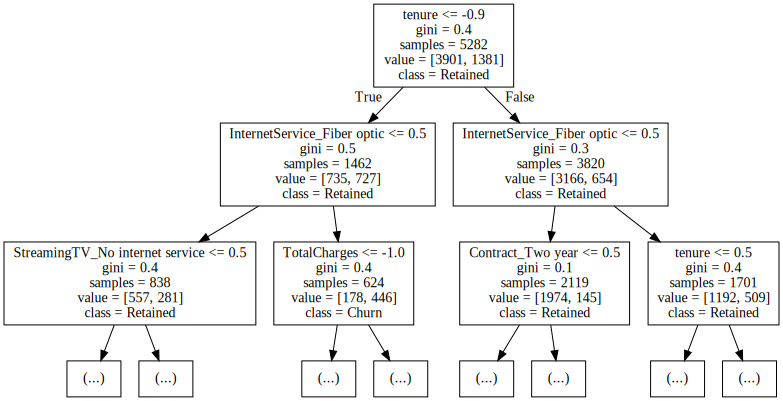

In [125]:
# decision tree can be displayed using the code below
# max_depth = 2 for easier visualisation

from sklearn import tree
import graphviz
exported = tree.export_graphviz(decision_tree = classifier, feature_names = cols, max_depth= 2, precision = 1, class_names = ['Retained', 'Churn'])
graph = graphviz.Source(exported)
display(graph)

We observe costumer tenure to be vital. With tenure < -0.6 (scaled) and no fibre internet access to the customer , The likelihood of sustomer churn/turnover is very high

In [126]:
# to interpret the coefficients of Logistic Regression, we calculate the exponents of the coefficients
# this gives us the change in odds ratio associated with 1 unit increase in the feature

coefs = pd.concat([pd.DataFrame(X_train.columns), pd.DataFrame(np.transpose(logreg.coef_))], axis=1)
coefs.columns = ['Feature', 'Coefficient']
coefs['Exp_Coef'] = np.exp(coefs['Coefficient'])
coefs  = coefs[coefs['Coefficient'] !=0]
print(coefs.sort_values(by=['Coefficient']))

                                  Feature  Coefficient  Exp_Coef
27                                 tenure    -1.474334  0.228931
21                      Contract_Two year    -1.270187  0.280779
20                      Contract_One year    -0.610512  0.543073
9                      OnlineSecurity_Yes    -0.416642  0.659257
15                        TechSupport_Yes    -0.373350  0.688424
3                        PhoneService_Yes    -0.292826  0.746152
28                         MonthlyCharges    -0.128833  0.879121
8      OnlineSecurity_No internet service    -0.125886  0.881715
10       OnlineBackup_No internet service    -0.125886  0.881715
18    StreamingMovies_No internet service    -0.125886  0.881715
7                      InternetService_No    -0.125886  0.881715
16        StreamingTV_No internet service    -0.125886  0.881715
12   DeviceProtection_No internet service    -0.125886  0.881715
14        TechSupport_No internet service    -0.125886  0.881715
23  PaymentMethod_Credit 

We observe that 'tenure' has the largest largest likelihood for customer churn as we previosly observed via the decision tree model.

Variables with exp_coef < 1 decreases the odds while variables with exp_coef > 1 increases the odds.

Hence an additional 1 year increase in tenure , would reduce the likelihood of customer churn by 77 %  (calculated as 1 - 0.23 = .77)